# Reddit Comments Analysis

This section has the purpose of extracting qualitative information about the sneakers comments we scrapped from reddit, to have a better insight of which sneakers are worth spending on, and which ones are not (shoes are not cheap!). 

Some of the information we would be interested in obtaining:

* Which are the most popular shoes?
* Do people like or dislike the shoe?
* What do the comments speak about the shoe?

Some of the techniques that we will use for achieving this goals are sentiment analysis, word2vec, lemmatization and topic modelling, among others.

<b>Let's get started</b>

At the begining of each of the subsections we will load all packages needed for it

In [1]:
import numpy as np
import pandas as pd

In [2]:
pd.set_option('display.max_rows', 5000)
pd.set_option('max_colwidth', 300)
pd.set_option('display.max_columns', 200)

Loading of dataset previously scrapped

In [3]:
Sneak = pd.read_csv('https://raw.githubusercontent.com/gabriellavinco/Sneaker_Data/master/Sneakers_Notebooks/Datasets/Comments_on_30sample.csv')


In [4]:
Sneak.shape

(2919, 3)

The dataset we will use consists of 2 columns, one indicating the comment, and another one indicating the shoe which the comment is related to. There are 2,919 comments in total, related to 19 sneakers.

In [5]:
Sneak=Sneak[["ShoeName","Comments"]]
Sneak.head(2)

,ShoeName,Comments
0,OFF-WHITE Odsy 1000,Love it. How heavy are these?
1,OFF-WHITE Odsy 1000,Post more pics of these.


In [6]:
Sneak

,ShoeName,Comments
0,OFF-WHITE Odsy 1000,Love it. How heavy are these?
1,OFF-WHITE Odsy 1000,Post more pics of these.
2,OFF-WHITE Odsy 1000,Actually really like these. The black colorway is so nice.
3,OFF-WHITE Odsy 1000,The topographic versions of these go crazy
4,OFF-WHITE Odsy 1000,Nice pick up
5,OFF-WHITE Odsy 1000,Literally want these sooo bad. Congrats
6,OFF-WHITE Odsy 1000,how do these fit? I tried on some off-whites last week and had to size down a lot
7,OFF-WHITE Odsy 1000,Where can I find these OMG!!
8,OFF-WHITE Odsy 1000,"Moderate, definitely should try them on if you're not used to slightly chunkier shoes"
9,OFF-WHITE Odsy 1000,"They weigh 150 kilograms and cost 400,000$ to wear... for twelve seconds"


Preview of some of the comments

In [7]:
Sneak["Comments"][:80]

0                                                                                                                                                                                                                                                                                   Love it. How heavy are these?
1                                                                                                                                                                                                                                                                                        Post more pics of these.
2                                                                                                                                                                                                                                                      Actually really like these. The black colorway is so nice.
3                                                                                 

## Which are the most popular shoes?

Popularity per shoe

For determining the <b style="color:purple"> popularity </b> of each of the shoes, we will obtain the number of comments related to each of them.

In [8]:
Sneak["ShoeName"].value_counts()

NMD CS2                             550
Jordan 8 Retro                      449
Air Foamposite One                  441
Gucci Slide                         369
Reebok Club C 85                    281
Saucony Grid 8000                   183
Reebok Question Mid                 171
Puma RS-Dreamer                     105
Futurecraft 4D 2021                  55
Puma Clyde Hardwood                  47
Air Max 95 SE                        46
New Balance 997 OG                   46
Cosmic Unity                         39
Yeezy QNTM BSKTBL                    37
Adilette 2                           32
OFF-WHITE Odsy 1000                  27
React Phantom Run Flyknit 2          27
Dunk Low Disrupt                     10
Balenciaga Speed Trainer Lace Up      4
Name: ShoeName, dtype: int64

In [9]:
Sneak["ShoeName"].value_counts().shape

(19,)

The <b style="color:darkred">NMD CS2</b> is the most popular shoe of the 19 being analyzed. 

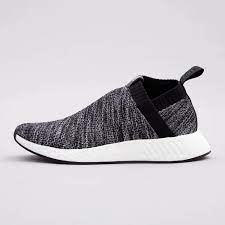



The <b style="color:darkred" >Balenciaga Speed Trainer Lace up </b> is, on the other hand, the less popular.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRJMqqky17DvmTD1bO-VhmSgj3PWwMBEDJ2qwoxdgrasHyS8EEKA5E_5QyujWvPW9fk4iaaIv3dlA&usqp=CAc">



## Do people like or dislike the shoe?
People's review 

For this task, we will make use of sentiment analysis techniques. Specifically, we will use the <b style="color:orange">compound</b> output of the <b style="color:orange">vader</b> algorithm.

We decided to use this algorithm because of the advantage of analyzing a comment as a whole and not as isolated words, and because of its ability to handle emojis, which are highly used on social media like reddit.

Loading of packages needed

In [10]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [11]:
analyzer = SentimentIntensityAnalyzer()

An example of sentiment analysis for 4 comments

In [12]:
print(Sneak["Comments"][0])
print(analyzer.polarity_scores(Sneak["Comments"][0]) )

Love it. How heavy are these?
{'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.6369}


In [13]:
print(Sneak["Comments"][5])
print(analyzer.polarity_scores(Sneak["Comments"][5]) )

Literally want these sooo bad. Congrats
{'neg': 0.312, 'neu': 0.268, 'pos': 0.42, 'compound': 0.0516}


In [14]:
print(Sneak["Comments"][6])
print(analyzer.polarity_scores(Sneak["Comments"][6]) )

how do these fit? I tried on some off-whites last week and had to size down a lot
{'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'compound': 0.3612}


In [15]:
print(Sneak["Comments"][756])
print(analyzer.polarity_scores(Sneak["Comments"][756]) )

That's them lebron st vincent joints 🔥🔥
{'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'compound': -0.5859}


By looking at those examples we could see that the vader algorithm is not perfect, since it is not able to correctly detect the sentiment of informal language (see comment 5). Another example is that the emoji "fire" is colloquially meant for something good, whereas vader takes it as "very negative" (comment 756). Still, the algorithm seems to be useful for our purposes.

We now apply the sentiment algorithm to all the comments

In [16]:
sentiment = Sneak["Comments"].apply(analyzer.polarity_scores)

In [17]:
sentiment[:200]

0         {'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.6369}
1                {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
2         {'neg': 0.0, 'neu': 0.555, 'pos': 0.445, 'compound': 0.7513}
3          {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'compound': -0.34}
4         {'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.4215}
5        {'neg': 0.312, 'neu': 0.268, 'pos': 0.42, 'compound': 0.0516}
6         {'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'compound': 0.3612}
7                {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
8         {'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.4019}
9                {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
10               {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
11               {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
12          {'neg': 0.0, 'neu': 0.76, 'pos': 0.24, 'compound': 0.6514}
13        {'neg': 0.0, 'neu': 0.485, 'pos': 0.515, 'compound': 0.6486}
14    

We convert the sentiment output into a dataframe

In [18]:
sentiment_df = pd.DataFrame(sentiment.tolist())
sentiment_df.head(3)

,neg,neu,pos,compound
0,0.0,0.543,0.457,0.6369
1,0.0,1.000,0.000,0.0000
2,0.0,0.555,0.445,0.7513


Sentiment output is added to the main dataframe

In [19]:
Sneak_sent = pd.concat([Sneak,sentiment_df], axis = 1)
Sneak_sent.head(3)

,ShoeName,Comments,neg,neu,pos,compound
0,OFF-WHITE Odsy 1000,Love it. How heavy are these?,0.0,0.543,0.457,0.6369
1,OFF-WHITE Odsy 1000,Post more pics of these.,0.0,1.000,0.000,0.0000
2,OFF-WHITE Odsy 1000,Actually really like these. The black colorway is so nice.,0.0,0.555,0.445,0.7513


<b style="color:darkblue">Distribution of compound.</b> 

We can see very few negative comments, while lots of neutral and positive comments.

<AxesSubplot:>

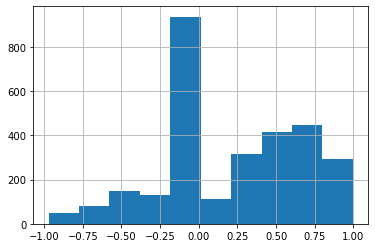

In [20]:
Sneak_sent["compound"].hist()

<b style="color:darkblue">Most negative comments</b>

In [21]:
Sneak_sent.sort_values(by="compound",ascending=True)[:5]

,ShoeName,Comments,neg,neu,pos,compound
680,Jordan 8 Retro,"FUCK THIS SHIT MAN, FUCK IT, I HATE BOTS, I HATE NIKE, I'M GONNA FUCKING RUN INTO THE OCEAN AND DIE.",0.593,0.407,0.000,-0.9716
476,Jordan 8 Retro,Fuck this stupid ass toxic sneaker culture. Stupid cunts can’t even take my money when I want to give it to them. \n\nI’ll see you fellas next drop.,0.470,0.499,0.031,-0.9612
2083,NMD CS2,🔥🔥🔥🔥🔥🔥🔥🔥🔥,1.000,0.000,0.000,-0.9559
490,Jordan 8 Retro,Footsites can honestly get fucked what in the hell is this Access Denied bullshit,0.567,0.325,0.108,-0.9287
2883,Gucci Slide,"it's actually cold as shit here in ohio right now but I still wear them around my house and to the gym so i can flex while I flex, and you know, when i fuck peoples bitches.",0.267,0.733,0.000,-0.9246


We again see the inability of the setniment tool to detect informal meanings, like comment 2083, which should be rated as something highly positive

<b style="color:darkblue">Most positive comments</b>

In [22]:
Sneak_sent.sort_values(by="compound",ascending=False)[:5]

,ShoeName,Comments,neg,neu,pos,compound
867,Reebok Question Mid,"Agreed wings are overrated. I'll take the hanon cntr any day. \n\nBut tassie devils best of the year for nb? Have you held a pair? Yes the colorway is amazing. The teeth detail is crazy. But the quality is subpar at best. At least on my pair. Shape is garbage and, in a year with such quality as ...",0.060,0.674,0.266,0.9965
944,React Phantom Run Flyknit 2,Depends on price range. I love the Nike epic react but durability isn't great. If you like the feeling of boost probably like a darker colorway of Ultra boost or even more durable would be the Ultra Boost ATR. The Kith Nonnative ultra boost mid is fantastic but not cheap depending on your size. ...,0.040,0.652,0.308,0.9940
862,Reebok Question Mid,"Best user?\n\nEDIT: It is clear Gillettedeodorant is the people's champ, he is the people's choice!\n\n[–]GilletteDeodorant 48 points 7 days ago*\n\nThe best reddit sneakers user = GIllettedeodorant\n\nEDIT: WOW such LOVE!!!!! thanks guys you know i expected this to be buried lol\n\nEDIT2: i lov...",0.000,0.586,0.414,0.9888
66,Puma Clyde Hardwood,"Ya dude, I have been watching Nightwing for years! He is super honest and just loves sneakers no matter the hype. Probably why he doesn’t have a million subscribers lol.\nI wear my Hardwoods casually as well right now.\nWhen it’s safe sometime in 2021 and indoor courts open up, I want to test th...",0.010,0.633,0.357,0.9873
35,Puma Clyde Hardwood,"Theyre good shoes, weartesters likes them for performance too. \n\n&#x200B;\n\nThis is my opinion personally. I wear a lot of sneakers but for me even .5 up, my toes couldnt really move. I have a wide and tall foot so i didnt find these comfortable (i just got in a new pair .5 up just to make su...",0.054,0.763,0.183,0.9851


Again, not all comments align with its compound, but we still think that the sentiment analysis is helpful, since the majority of the comments possess an adecuate compound. 

We look at the <b style="color:darkblue">average compound per comment</b>. We were already expecting something similar by looking at the compound's histogram.

In [23]:
Sneak_sent[["neg","neu","pos","compound"]].apply(sum)/Sneak_sent.shape[0]

neg         0.063418
neu         0.759339
pos         0.177244
compound    0.231197
dtype: float64

<b style="color:darkblue">Sneakers with best and worst comments</b>

Now we grouped the comments' compound by shoe. We use for that the average function.
We can now see which shoes have positive comments and which negative comments.

In [24]:
Grouped=Sneak_sent.groupby('ShoeName').agg({'compound':['mean','count']})
Grouped.columns = Grouped.columns.get_level_values(1)

<b>Shoe compound's distribution</b>

The majority of the shoe's compounds is concentrated close to the 0.2 value

<AxesSubplot:>

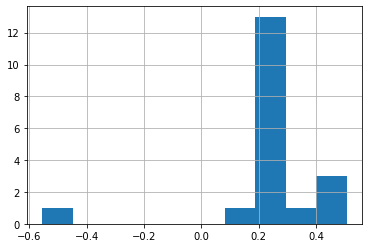

In [25]:
Grouped["mean"].hist()

<b>Distribution of number of comments per shoe</b>

Most of the shoes possess less than 100 comments, altough there are some of them that exceed this threshold

<AxesSubplot:>

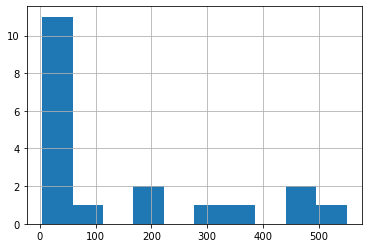

In [26]:
Grouped["count"].hist()

We order the shoes by their average compound and get some interesting information

In [27]:
Grouped.sort_values(by='mean')

,mean,count
ShoeName,,
Balenciaga Speed Trainer Lace Up,-0.555625,4
Gucci Slide,0.163332,369
Air Foamposite One,0.198488,441
Saucony Grid 8000,0.204927,183
Jordan 8 Retro,0.209704,449
Air Max 95 SE,0.215754,46
NMD CS2,0.228864,550
OFF-WHITE Odsy 1000,0.229763,27
Yeezy QNTM BSKTBL,0.235686,37


<b style="color:darkblue"> Conclusion: </b>

* Never get the Balenciaga! Go for the Puma Clyde
* Most of the comments, and hence the shoes, are mentioned in a positive way in social media. People like them!

Most liked shoe: <b> Puma Clyde Hardwood</b>

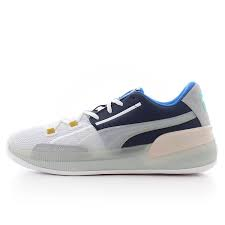

## What do the comments speak about the shoe?

### Part 1: Most mentioned words

The first approach to understand what do comments speak about would be to find the words that are constantly being repeated in them, so we will just count the number of times a word appears. Before this we will do a little bit of data pre-processing. This includes:

* Word lemmatization (the words <b>"am"</b>, <b>"is"</b> and <b>"are"</b>, will be changed into a single root word <b>"be"</b>, for example)
* Removing of stopwords
* Removing of other words that do not provide additional information in our analysis (like the words <b>"shoe"</b>, <b>"sneacker"</b> and <b>"pair"</b>, for example)

Loading of packages needed

In [28]:
from nltk.corpus import wordnet
import nltk
from nltk.stem import WordNetLemmatizer
from pdtext.tf import make_wf_df
from nltk.corpus import stopwords 
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

Function for word lemmatization

In [29]:
lemmatizer = WordNetLemmatizer()

# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

We add the lemmatized comments in the dataframe 

In [30]:
Sneak["Comments_Lemmatized"]=Sneak["Comments"].apply(lemmatize_sentence)
Sneak.head(2)

,ShoeName,Comments,Comments_Lemmatized
0,OFF-WHITE Odsy 1000,Love it. How heavy are these?,Love it . How heavy be these ?
1,OFF-WHITE Odsy 1000,Post more pics of these.,Post more pic of these .


We obtain the frequency of each word 

In [31]:
wordcount=make_wf_df(Sneak["Comments_Lemmatized"], tfidf = False).sum()
wordcount.sample(4)

air             35
j               13
later            9
futurecrafts     1
dtype: int64

We convert the format of our data into a dataframe

In [32]:
wordcount_df=pd.DataFrame(data={"Word":wordcount.index, "Frequency":wordcount.values})
wordcount_df.head(2)

,Word,Frequency
0,0,32
1,00,2


Removal of stopwords

In [33]:
stop_words = set(stopwords.words('english')) #stop_words is a dictionary, not a list
wordcount_df=wordcount_df[~wordcount_df["Word"].isin(stop_words)]
wordcount_df.sample(4)

,Word,Frequency
2759,mostly,7
223,6s,2
761,boy,7
151,309,1


We look at the frequency distribution just for curiosity

In [34]:
wordcount_df['Frequency'].describe()

count    4592.000000
mean        6.349303
std        20.184586
min         1.000000
25%         1.000000
50%         1.000000
75%         4.000000
max       543.000000
Name: Frequency, dtype: float64

More than 50% of the different words are only mentioned once. The most frequent word appears 543 times.

We look for the most frequent words

In [35]:
wordcount_df.sort_values(by="Frequency",ascending=False)[:10]

,Word,Frequency
1880,get,543
2505,like,367
3702,shoe,367
2787,n,333
2551,look,273
3747,size,272
1914,go,269
3038,pair,264
1930,good,211
2961,one,201


Some of these words do not provide relevant information (look at "n", "shoe", "pair"...)
Hence we will also add to the stopwords list these kind of words.

In [36]:
for a in ['em','ll',"n't",'u','re','d','s','v','m','will','ve','TT','shoe','pair','still','though','foot','know',
          'sneaker','people','one','thank',"go","TTS","year","CS2","cop","time"]:
    STOPWORDS.add(a)

We now present a more visual way of displaying the 50 most frequent words. The size of the word is proportional to its frequency.

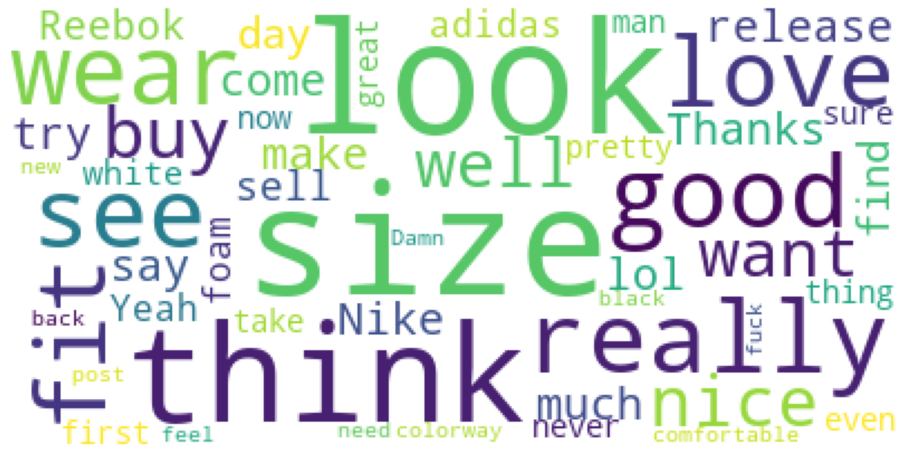

In [37]:
wordcloud = WordCloud(background_color='white',
                      stopwords=STOPWORDS,
                      max_words=50,
                      max_font_size=70,
                      random_state=42).generate(str(Sneak["Comments_Lemmatized"]))
fig = plt.figure(1,figsize=(16,10))
plt.imshow(wordcloud)
plt.axis('off');

From this picture we can conclude several things:

* The word "look" makes us think that a lot of the people that comment are way more attracted to the aesthetics of a shoe, than to the comfort or quality of it, since the word "comfortable" is not as frequent.
* The words "size", "try", "fit" also makes us think that a lot of the comments are related to people probably asking which size to buy, or telling their experience with a specific size.
* There are a lot of positive words to describe the shoes ("pretty", "good", "nice", "love","great").
* The words "buy", "sell" and "release" are present. It could be that some of the comments are from people that own a shoe business. 
* Some of the brands are mentioned too, namely Adidas, Nike and Reebok.
* Some of the comments mention colors a lot ("white","black","colorway")
* People are not interested in commenting about the price of the shoes

### Part 2: Topic modelling

We already have an idea of the most important characteristics of the comments thanks to the most frequent words, but there could be for example, that there were a lot of words related to a specific topic, which independently are not that frequent but combined are. 

For example, it could be that words as "soccer", "basketball", "run" do not possess a high frequency independently, but altogether amount for a high frequency. It would be impossible to detect this if we would only look for word frequencies. Hence, we decided to perform a topic modelling analysis to look if there are apart from the characteristics seen so far, other topics highly related to the comments.

We load packages needed

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

Here we apply the CountVectorizer function to our data, since the LDA algorithm requires this sparce matrix as input.

In [39]:
vectorizer = CountVectorizer(lowercase   = True,   #CountVectorizer and make_wf_df are useful for the same problems
                             ngram_range = (1,1),
                             max_df      = .90,
                             stop_words  = stop_words,
                             min_df      = .001,
                             max_features = None)

In [40]:
vectorizer.fit(Sneak["Comments_Lemmatized"])
SparseMatrix = vectorizer.transform(Sneak["Comments_Lemmatized"])

We apply the LDA algorithm

In [41]:
lda_model = LatentDirichletAllocation(n_components   = 10,
                                      max_iter       = 100,
                                      evaluate_every = 5,
                                      verbose = 1
                                     )

In [42]:
lda_model.fit(SparseMatrix)

iteration: 1 of max_iter: 100
iteration: 2 of max_iter: 100
iteration: 3 of max_iter: 100
iteration: 4 of max_iter: 100
iteration: 5 of max_iter: 100, perplexity: 1150.7509
iteration: 6 of max_iter: 100
iteration: 7 of max_iter: 100
iteration: 8 of max_iter: 100
iteration: 9 of max_iter: 100
iteration: 10 of max_iter: 100, perplexity: 1077.6386
iteration: 11 of max_iter: 100
iteration: 12 of max_iter: 100
iteration: 13 of max_iter: 100
iteration: 14 of max_iter: 100
iteration: 15 of max_iter: 100, perplexity: 1047.9995
iteration: 16 of max_iter: 100
iteration: 17 of max_iter: 100
iteration: 18 of max_iter: 100
iteration: 19 of max_iter: 100
iteration: 20 of max_iter: 100, perplexity: 1032.5531
iteration: 21 of max_iter: 100
iteration: 22 of max_iter: 100
iteration: 23 of max_iter: 100
iteration: 24 of max_iter: 100
iteration: 25 of max_iter: 100, perplexity: 1023.4683
iteration: 26 of max_iter: 100
iteration: 27 of max_iter: 100
iteration: 28 of max_iter: 100
iteration: 29 of max_iter:

LatentDirichletAllocation(evaluate_every=5, max_iter=100, verbose=1)

Functions needed to extract the most relevant words for each topic

In [43]:
def column_swap(column):
    column = column.sort_values(ascending = False)
    return column.index.astype(str)+' - '+np.round(column.values,1).astype(str)

def topic_words_df(lda_model, vectorizer):
    '''
    Generate dataframe of words associated with a topic model.
    '''
    
    word_topic_scores = lda_model.components_.T
    vocabulary        = vectorizer.get_feature_names()
    
    
    topic_words_df = pd.DataFrame(word_topic_scores,
                                  index = vocabulary)
    
    topic_words_df = topic_words_df.apply(column_swap).reset_index(drop = True).rename_axis('rank')
    
    topic_words_df.index = topic_words_df.index + 1
    
    return topic_words_df

Rank of the most important words per topic. We only focus on the top 10 words per topic 

In [44]:
topic_words_df(lda_model, vectorizer).head(5)

,0,1,2,3,4,5,6,7,8,9
rank,,,,,,,,,,
1,love - 94.3,http - 116.1,shoe - 110.3,nice - 74.8,foot - 115.5,get - 125.2,look - 84.3,size - 217.6,get - 123.3,thanks - 122.1
2,get - 82.8,com - 116.1,like - 88.6,look - 72.9,fit - 105.5,go - 53.8,good - 80.6,go - 73.3,pair - 82.5,man - 59.4
3,one - 80.1,cs2 - 51.8,think - 64.1,black - 52.6,size - 54.6,lol - 49.7,get - 67.4,gucci - 70.1,like - 69.7,get - 39.9
4,shoe - 77.5,www - 49.1,would - 52.9,clean - 51.1,wear - 52.6,like - 48.8,like - 58.2,slide - 67.2,want - 68.6,think - 30.2
5,pair - 55.3,adidas - 48.1,make - 49.5,white - 38.2,tts - 51.7,time - 48.4,na - 57.1,half - 48.5,go - 55.9,oh - 26.6


Of the 10 topics obtained by the algorithm, we think that only topic 2 (related to colors) and topic 9 (related to fit and size) make sense, but we already knew this by the word frequencies. We conclude that our topic modelling was not very useful for our objectives.

## Wrapping everything up

Detailed shoe perception (word2vec with categories + PCA + Biplot)

We have already found the average sentiment that comments have for each of the shoes via sentiment analysis, and thanks to word frequencies and topic modelling we have an idea of some of the characteristics that could explain what the comments are about in general.

Now its time to combine these information in such a way that we obtain in a single analysis all the information possible about a shoe.

For this task we will do the following steps:

* With the help of word frequencies and <b>topic modelling</b>, we will select the characteristics we think are more related to the comments
* With the help of the <b>word2vec</b> algorithm, we will obtain the average similarity between each of the comments and the characteristics defined above. We will then average this similarities by shoe
* We will do a <b>principal component analysis</b> for these similarities. We will interpret the first 2 components.
* We will display in a single graph the first 2 principal components and the compound from sentiment analysis, and draw conclussions from here

Let's do it!

Loading of packages

In [45]:
import gensim.downloader as api
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import re
import pca as pc
import matplotlib.pyplot as plt
import matplotlib

C:\Home\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


We load the word2vec model of google

In [46]:
gn_model = api.load('word2vec-google-news-300') #MILLIONS OF DOCUMENTS!!!! :O :O :O

It's important to mention that even though it was trained using millions of documents, the model we are using will have problems with some words that are very informal.

The characteristics we decided could be of interest given the previous results of the analysis are displayed as follows. We also added the characteristic "quality" because we were curious to know how related is it from the shoes' comments

In [47]:
characteristics=["pretty","size","color","comfortable","sell","quality"]

### Word2vec similarities

Before obtaining similarities, we must remove stopwords and words outside of the dictionary which the <b>word2vec</b> algorith was trained

In [48]:
stop_words = set(stopwords.words('english')) 

We define a function to add to the shoes' dataset the newly calculated similarities. These will be stored in the columns whose name starts with the prefix "SimChar_" (for similarity characteristic)

In [49]:
def Sim_Char(dataframe,columnofcomments,characteristic):
    listaux=[]
    for coms in dataframe[columnofcomments]:
        word_tokens = word_tokenize(coms)  
        filtered_sentence = [w for w in word_tokens if not w in stop_words] #removes stop words
        filtered_sentence = [w for w in filtered_sentence if w in gn_model.key_to_index] #checks if word is known by the gn_model
        if len(filtered_sentence)>0:
            listaux.append(sum([gn_model.similarity(i,characteristic) for i in filtered_sentence])/len(filtered_sentence))
        else:
            listaux.append(np.nan)      
    dataframe["SimChar_"+characteristic]=listaux
    return(dataframe)
       

We obtain the similarity average per comment, and then the similarity average per shoe.

In [50]:
for chars in characteristics:
    Sneak_sent_sim=Sim_Char(Sneak_sent,"Comments",chars)
Sneak_sent_sim.head(3)  # Nice :D

,ShoeName,Comments,neg,neu,pos,compound,SimChar_pretty,SimChar_size,SimChar_color,SimChar_comfortable,SimChar_sell,SimChar_quality
0,OFF-WHITE Odsy 1000,Love it. How heavy are these?,0.0,0.543,0.457,0.6369,0.165855,0.117725,0.072663,0.085921,0.034640,0.060263
1,OFF-WHITE Odsy 1000,Post more pics of these.,0.0,1.000,0.000,0.0000,0.122272,0.032052,0.065048,0.045025,0.026213,0.003150
2,OFF-WHITE Odsy 1000,Actually really like these. The black colorway is so nice.,0.0,0.555,0.445,0.7513,0.339415,0.142135,0.217031,0.209108,0.080558,0.114581


In [51]:
Grouped_sent_sim=Sneak_sent_sim.groupby("ShoeName").agg({'compound':['mean','count'],'SimChar_pretty': 'mean',
                                                         "SimChar_size":'mean' ,"SimChar_color": 'mean',"SimChar_comfortable": 'mean',
                                                        "SimChar_sell": 'mean', "SimChar_quality": 'mean'})

<b>Most important characteristics by shoe</b> (we first get rid of the two-level column names)

In [52]:
Grouped_sent_sim.columns = Grouped_sent_sim.columns.map('|'.join).str.strip('|')

In [53]:
Grouped_sent_sim

,compound|mean,compound|count,SimChar_pretty|mean,SimChar_size|mean,SimChar_color|mean,SimChar_comfortable|mean,SimChar_sell|mean,SimChar_quality|mean
ShoeName,,,,,,,,
Adilette 2,0.285944,32,0.196824,0.095347,0.088979,0.155001,0.084589,0.077897
Air Foamposite One,0.198488,441,0.208384,0.086009,0.101820,0.127585,0.086095,0.084188
Air Max 95 SE,0.215754,46,0.216493,0.096371,0.097899,0.142465,0.088581,0.086382
Balenciaga Speed Trainer Lace Up,-0.555625,4,0.255743,0.092599,0.095598,0.155067,0.111689,0.090308
Cosmic Unity,0.401290,39,0.226087,0.097381,0.102886,0.157981,0.095063,0.089705
Dunk Low Disrupt,0.257710,10,0.152897,0.103182,0.103436,0.118776,0.079586,0.078032
Futurecraft 4D 2021,0.451689,55,0.194195,0.132036,0.093209,0.156081,0.091156,0.096258
Gucci Slide,0.163332,369,0.196851,0.082806,0.096381,0.127806,0.088676,0.075462
Jordan 8 Retro,0.209704,449,0.193275,0.089571,0.091134,0.125863,0.094260,0.082458


We analyse which characteristics are predominant within our sample

In [54]:
Grouped_sent_sim.describe()

,compound|mean,compound|count,SimChar_pretty|mean,SimChar_size|mean,SimChar_color|mean,SimChar_comfortable|mean,SimChar_sell|mean,SimChar_quality|mean
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,0.233763,153.631579,0.202018,0.094948,0.098350,0.136857,0.088719,0.083360
std,0.211346,175.430015,0.019720,0.010613,0.004731,0.012859,0.008135,0.006221
min,-0.555625,4.000000,0.152897,0.079375,0.088979,0.118776,0.076864,0.074329
25%,0.212729,34.500000,0.193957,0.090593,0.095890,0.127177,0.085280,0.078228
50%,0.237800,47.000000,0.199711,0.094562,0.098109,0.134566,0.088676,0.082458
75%,0.282074,232.000000,0.208753,0.096848,0.102353,0.144998,0.091979,0.088391
max,0.506581,550.000000,0.255743,0.132036,0.104918,0.157981,0.111689,0.096258


<b>By looking at the mean, we can conclude that</b>

<b>Most common characteristic:</b>  "Pretty" by far   
<b>Less common characteristic:</b>  "Quality"

If we were to sort the characteristics by importance, the most important will clearly be "Pretty" (mean=0.20), followed by "Comfortable" (mean=0.14), "Color" (0.10), "Size" (0.10), "Sell" (0.09) and "Quality" (0.08)

Conclusion: people are definitely not interested in the quality of the shoes. They are far more interested in how good they look

### Principal Component Analysis.

We will now proceed to calculate the characteristics principal components and to interpret them. 

It's important to note that we will not standardize our variables since the ones with more variability are the most important ones, and we want to preserve this importance in the analysis. 

By doing this, we already know that the first principal component will basically be the most important characteristic, "pretty".

We call a pca object

In [55]:
pca = pc.pca()

We fit the principal component algorithm to the characteristics

In [56]:
Df_PCA=Grouped_sent_sim[Grouped_sent_sim.columns[[bool(re.search("SimChar_",i)) for i in Grouped_sent_sim.columns]]] #Variables that begin with "SimChar_"
principalComponents = pca.fit_transform(Df_PCA)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


Loadings of first 2 components

In [57]:
principalComponents.get('loadings').iloc[:2,]

,SimChar_pretty|mean,SimChar_size|mean,SimChar_color|mean,SimChar_comfortable|mean,SimChar_sell|mean,SimChar_quality|mean
PC1,0.849328,0.015336,-0.023870,0.434565,0.256752,0.151885
PC2,-0.317414,0.755252,-0.096988,0.509178,-0.010908,0.245059


As expected, the first principal component relies heavily on the characteristic "pretty", but it is also mildly related to the characteristic "comfortable". Hence, the comments of the shoes with high scores in their first principal component will tend to be related to aesthetics and comfortability.

On the other hand, comments from shoes with high scores in their second principal component, will tend be related to size of the shoes and also comfortability.

The explained variance is presented below. The first 2 components account for more than 80% of the variability

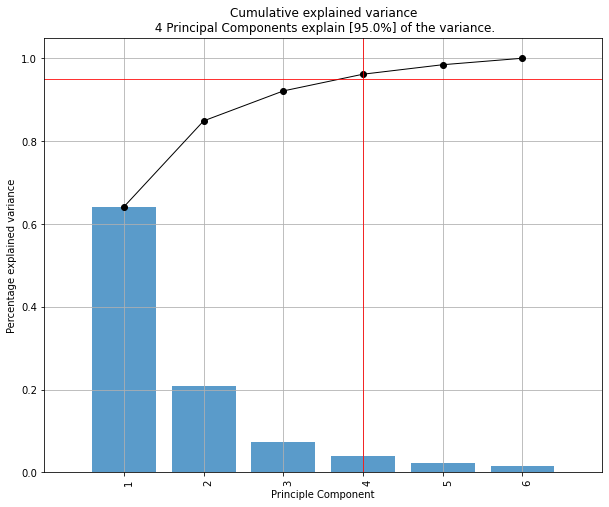

<Figure size 432x288 with 0 Axes>

In [58]:
# Plot explained variance
fig, ax = pca.plot()

### Biplot and Interpretations

We create a dataframe with just the first 2 principal components plus the compound of the sentiment analysis

In [103]:
Df_PCA_Biplot=principalComponents.get('PC')[['PC1','PC2']]

In [104]:
Df_PCA_Biplot['Compound']=Grouped_sent_sim["compound|mean"]

C:\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [105]:
Df_PCA_Biplot

,PC1,PC2,Compound
Adilette 2,0.001814,0.010804,0.285944
Air Foamposite One,0.000611,-0.013597,0.198488
Air Max 95 SE,0.015188,0.000121,0.215754
Balenciaga Speed Trainer Lace Up,0.060527,-0.007836,-0.555625
Cosmic Unity,0.032144,0.006000,0.401290
Dunk Low Disrupt,-0.052726,0.010905,0.257710
Futurecraft 4D 2021,0.004987,0.043916,0.451689
Gucci Slide,-0.009671,-0.013883,0.163332
Jordan 8 Retro,-0.010827,-0.006465,0.209704
NMD CS2,-0.006670,-0.005329,0.228864


In [106]:
NameSmall=["Adilette","Foamposite","Air Max","Balenciaga","Cosmic","Dunk Low","Futurecraft","Gucci","Jordan 8","NMD","New Balance","OFF-WHITE","Puma Clyde","Puma Dreamer","React Phantom","Reebok Club","Reebok Question","Saucony","Yeezy"]

<b>Now we combine sentiment analysis with the main characteristics of the shoes comments.
    
The following graph displays on the x-axis the first principal component, and in the y-axis the second one. Additionally, the color of the dots is denoted by the compound value. We also display the direction and importance of the characteristics in the form of vectors.
    
In this way, the location of the shoe indicates the characteristics related to its comments, while the color of its dot denotes how positive or negative the comments were. 

In [68]:
principalComponents.get('loadings').iloc[:2,]

,SimChar_pretty|mean,SimChar_size|mean,SimChar_color|mean,SimChar_comfortable|mean,SimChar_sell|mean,SimChar_quality|mean
PC1,0.849328,0.015336,-0.023870,0.434565,0.256752,0.151885
PC2,-0.317414,0.755252,-0.096988,0.509178,-0.010908,0.245059


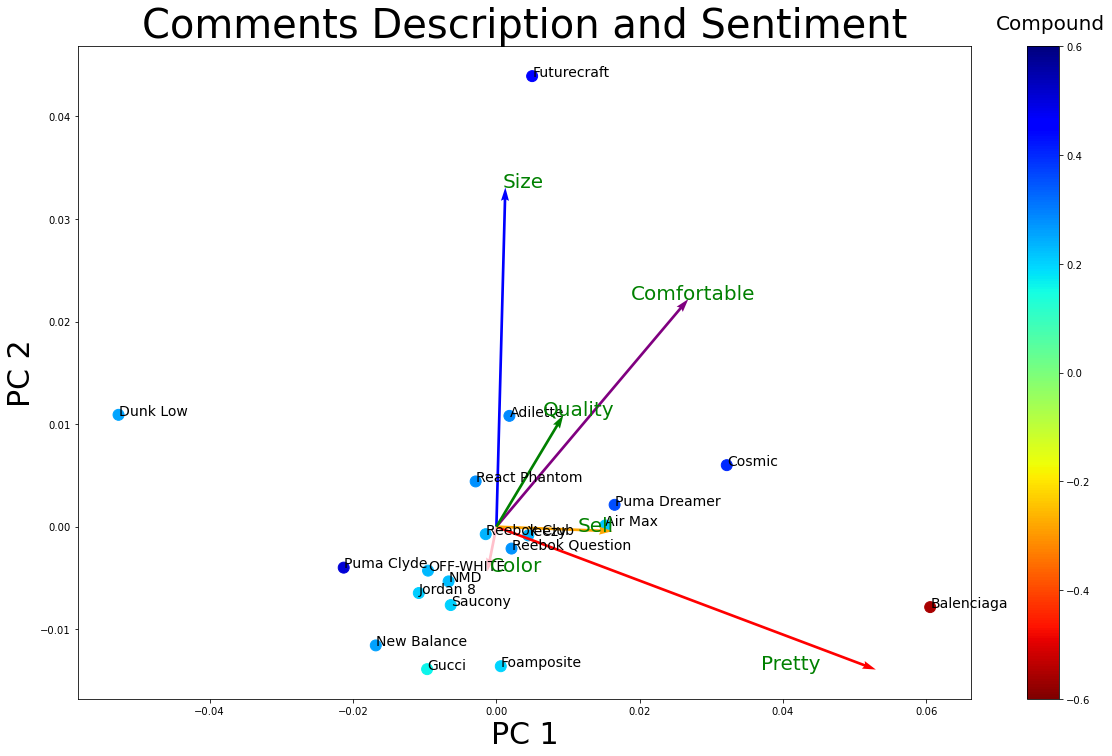

In [135]:
plt.subplots(figsize=(20, 12))
plt.scatter(Df_PCA_Biplot["PC1"], Df_PCA_Biplot["PC2"], c=Df_PCA_Biplot["Compound"], s=120, vmin=-0.6, vmax=0.6, 
            cmap = matplotlib.cm.get_cmap('jet_r')) #
#plt.colorbar()
plt.colorbar().set_label('Compound', rotation=0, size=20, labelpad=-40, y=1.05)
plt.ylabel("PC 2",size=30)
plt.xlabel("PC 1",size=30)
plt.title("Comments Description and Sentiment",size=40)
NameSmall=["Adilette","Foamposite","Air Max","Balenciaga","Cosmic","Dunk Low","Futurecraft","Gucci","Jordan 8","NMD",
           "New Balance","OFF-WHITE","Puma Clyde","Puma Dreamer","React Phantom","Reebok Club","Reebok Question","Saucony",
           "Yeezy"] #For reducing amount of words in the plot
for i, txt in enumerate(Df_PCA_Biplot.index):
    plt.annotate(NameSmall[i], (Df_PCA_Biplot["PC1"][i], Df_PCA_Biplot["PC2"][i]),size=14)
    
V = np.array([[0.85,-0.32], [0.02,0.76], [-0.02,-0.10],[0.43,0.51],[0.26,-0.01],[0.15,0.25]])
origin = np.array([[0, 0, 0,0,0,0],[0, 0, 0,0,0,0]]) # origin point
plt.quiver(*origin, V[:,0], V[:,1], color=['red','blue','pink','purple','orange','green'], scale=2,width=0.003)
characteristics=["Pretty","Size","Color","Comfortable","Sell","Quality"] 
for i in range(6):
    plt.text(V[i][0]/23, V[i][1]/23, characteristics[i], color='green',size=20)
    
plt.show()

From the previous plot we can extract relevant information such as:

* The Futurecraft shoe is a comfortable and high quality shoe, in which the sizes fit very well, altough is not a shoe known for being pretty.

* The Cosmic shoe is a very comfortable and high quality shoe, and it's also considered a very pretty shoe. The Puma Dreamer shares the same characteristics as the Cosmic, but in a lower level. 

* Most of the comments regarding the Balenciaga shoe critiziced the shoe for being ugly (very negative compound).

* Most of the comments related to the Foamposite were about how it look (high in pretty and color), altough the feelings for the shoe were kind of average. Not too bad, but also not too great. The same happens with the Gucci.

* People who comment about the quality of a shoe, also commented how comfortable it was, and reserved themselves for speaking about aesthetics of the shoe like the color.


It's important to note that of all shoes analyzed, all of them had more than 10 comments but the Balenciaga, which had only 4 comments. Therefore, it may be possible that the conclussions of this shoe could not reflect what most of the people think.

In addition to the conclusions and interpretations mentioned above,

* The combination of natural language processing techniques proved to be very useful in understanding the nature of the comments.
* Most of the people tend to comment positive than negative things about the sneackers. 
* There is a significant proportion of comments related to characteristics like "pretty", "comfortable" and "size/fit" of the shoe
* Topic modelling by itself did not prove very helpful for extracting topics. In our case, word frequencies proved to be more helpful for finding the comments' characteristics